<h1>Custom Image Classification</h1>

In the real world the data we are using will not be nicely formatted as part of a library, it is likely that we will be creating our own datasets. In this example we are exploring a realistic binary classification problem.

Let's explore what its like to work with a more realistic data set. The dataset has been taken from Kaggle and there are 12,500 images of both cats and dogs (this is a large dataset).<br/><br/>
<h2>Visualising Image Data</h2>

In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat1 = cv2.imread('./CATS_DOGS/train/CAT/1.jpg')
cat1 = cv2.cvtColor(cat1,cv2.COLOR_BGR2RGB)

In [3]:
type(cat1)

numpy.ndarray

In [4]:
cat1.shape

(281, 300, 3)

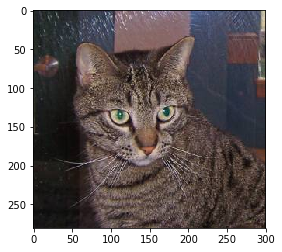

In [5]:
plt.imshow(cat1)

In [6]:
dog1 = cv2.imread('./CATS_DOGS/train/Dog/1.jpg')
dog1 = cv2.cvtColor(dog1,cv2.COLOR_BGR2RGB)

In [7]:
dog1.shape

(500, 327, 3)

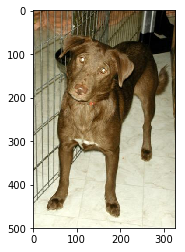

In [8]:
plt.imshow(dog1)

<h2>Preparing the Data for the model</h2>

There is too much data for us to read all at once in memory. We can use some built in Keras functions to automatically process the data, generate a flow of batches from a directory and manipulate the images.

<b>Image Manipulation</b>

It is standard practice to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that the data set doesn't represent. We can use the **ImageDataGenerator** to do this automatically.

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\saura\Anaconda3\envs\AI2_course\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\saura\Anaconda3\envs\AI2_course\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\saura\Anaconda3\envs\AI2_course\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\saura\Anaconda3\envs\AI

In [10]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

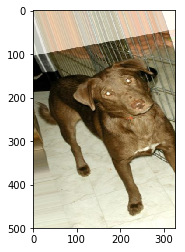

In [11]:
plt.imshow(image_gen.random_transform(dog1))

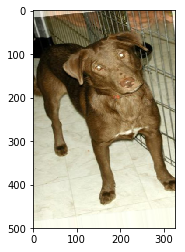

In [12]:
plt.imshow(image_gen.random_transform(dog1))

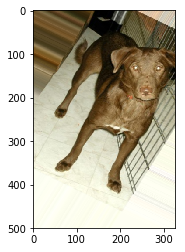

In [13]:
plt.imshow(image_gen.random_transform(dog1))

<b>Manipulating images automatically from directory</b>

In order to use .flow_from_directory, you must organise the images in sub-directories. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [14]:
image_gen.flow_from_directory('./CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory('./CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


<b>Resizing Images</b>

Keras can resize all the images to 150 pixels by 150 pixels once they've been manipulated so they are all a standard size for analysis.

In [16]:
# width,height,channels
image_shape = (150,150,3)

<h2>Building the Model</h2>

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

<h2>Training the Model</h2>

In [20]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('./CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory('./CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
!pip install pillow


In [25]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
150/150 [==============================] - 51s 337ms/step - loss: 0.6939 - acc: 0.5392 - val_loss: 0.6785 - val_acc: 0.5729
Epoch 2/100
150/150 [==============================] - 50s 332ms/step - loss: 0.6832 - acc: 0.5621 - val_loss: 0.6628 - val_acc: 0.6198
Epoch 3/100
150/150 [==============================] - 54s 359ms/step - loss: 0.6548 - acc: 0.6125 - val_loss: 0.6488 - val_acc: 0.6302
Epoch 4/100
150/150 [==============================] - 53s 350ms/step - loss: 0.6601 - acc: 0.6021 - val_loss: 0.6590 - val_acc: 0.6198
Epoch 5/100
150/150 [==============================] - 50s 331ms/step - loss: 0.6405 - acc: 0.6400 - val_loss: 0.6210 - val_acc: 0.6615
Epoch 6/100
150/150 [==============================] - 50s 335ms/step - loss: 0.6421 - acc: 0.6267 - val_loss: 0.6033 - val_acc: 0.7135
Epoch 7/100
150/150 [==============================] - 49s 325ms/step - loss: 0.6524 - acc: 0.6208 - val_loss: 0.6310 - val_acc: 0.6719


Epoch 59/100
150/150 [==============================] - 48s 323ms/step - loss: 0.4727 - acc: 0.7788 - val_loss: 0.4008 - val_acc: 0.8229
Epoch 60/100
150/150 [==============================] - 48s 321ms/step - loss: 0.4319 - acc: 0.8046 - val_loss: 0.4183 - val_acc: 0.8177
Epoch 61/100
150/150 [==============================] - 48s 320ms/step - loss: 0.4392 - acc: 0.7942 - val_loss: 0.4729 - val_acc: 0.7760
Epoch 62/100
150/150 [==============================] - 48s 318ms/step - loss: 0.4196 - acc: 0.8167 - val_loss: 0.4046 - val_acc: 0.8021
Epoch 63/100
150/150 [==============================] - 48s 321ms/step - loss: 0.4312 - acc: 0.7998 - val_loss: 0.3808 - val_acc: 0.8333
Epoch 64/100
150/150 [==============================] - 49s 324ms/step - loss: 0.4393 - acc: 0.8037 - val_loss: 0.4713 - val_acc: 0.7917
Epoch 65/100
150/150 [==============================] - 51s 341ms/step - loss: 0.4478 - acc: 0.7913 - val_loss: 0.4591 - val_acc: 0.7812
Epoch 66/100
150/150 [===================

In [26]:
model.save('cat_dog_classifier100ep-150st.h5')

<h2>Measuring the Model Results</h2>

In [28]:
results.history['val_accuracy']

KeyError: 'val_accuracy'

In [29]:
plt.plot(results.history['val_accuracy'])

KeyError: 'val_accuracy'

<h2>Predicting</h2>

In [30]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [31]:
import numpy as np
from keras.preprocessing import image

cat_imgfile = './cattest1.jpg'

catimg = image.load_img(cat_imgfile, target_size=(150, 150))

catimg = image.img_to_array(catimg)

catimg = np.expand_dims(catimg, axis=0)
catimg= catimg/255

In [32]:
prediction_prob = model.predict(catimg)

In [33]:
# Output prediction
print(f'Probability that image is a Cat is: {prediction_prob} ')

Probability that image is a Cat is: [[0.15135975]] 


In [34]:
import numpy as np
from keras.preprocessing import image

cat_imgfile = './cattest2.jpg'

catimg = image.load_img(cat_imgfile, target_size=(150, 150))

catimg = image.img_to_array(catimg)

catimg = np.expand_dims(catimg, axis=0)
catimg= catimg/255
prediction_prob = model.predict(catimg)
print(f'Probability that image is a Cat is: {prediction_prob} ')

Probability that image is a Cat is: [[0.5230088]] 


<h1>Challenge: Try a lower number of Epochs</h1><br/>
It will take less time to run but the performance of the network may not be as effective.<br/> 
Try passing different images in for prediction, are there any surprises?<br/>
There are many binary classification datasets on Kaggle, try this notebook with a new dataset.